# Data Wrangling et Statistiques

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_df = sns.load_dataset("iris")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Visualisation des distributions

<Axes: ylabel='Frequency'>

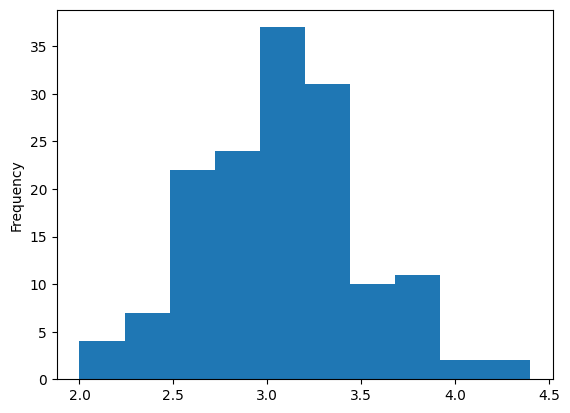

In [7]:
iris_df['sepal_width'].plot(kind ="hist")

<Axes: ylabel='Frequency'>

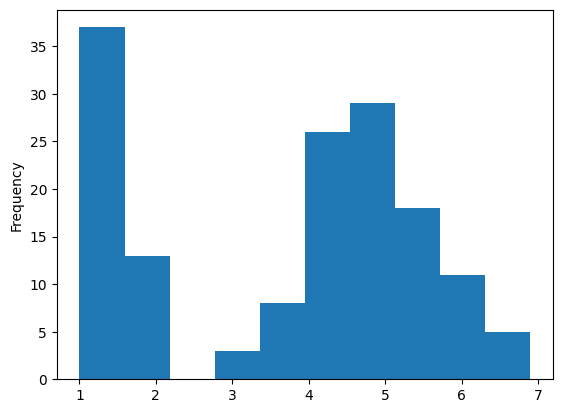

In [8]:
iris_df['petal_length'].plot(kind = "hist")

## Correlation

In [12]:
iris_df.corr(numeric_only = True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

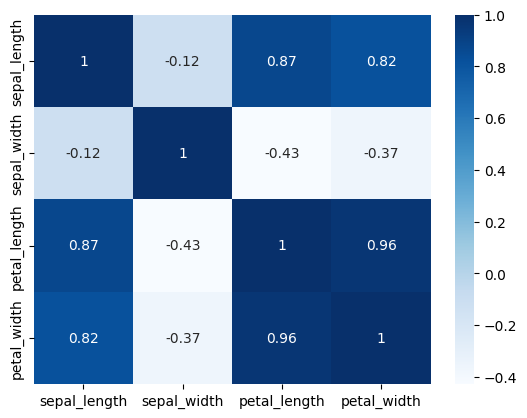

In [13]:
sns.heatmap(iris_df.corr(numeric_only = True), cmap="Blues", annot = True)

Quelles variables choisir pour un modèle ML ?

On choisit les colonnes sepal_width, sepal_length, petal_length 

## Préparation de la donnée 

In [16]:
titanic_df = sns.load_dataset("titanic")
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Que faire avec la variable `deck` ?

In [18]:
titanic_df['deck'].value_counts(dropna= False)

deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64

### Que faire avec la variable `age` ?

<Axes: ylabel='Frequency'>

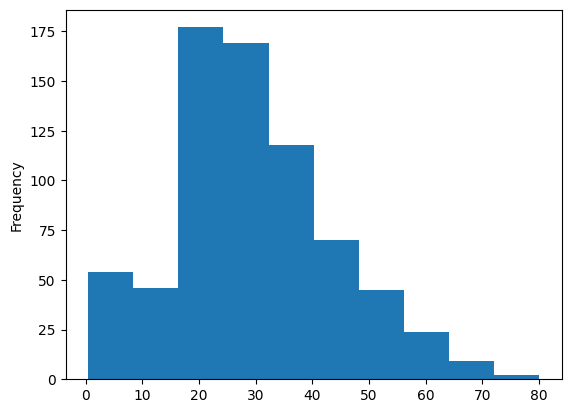

In [19]:
titanic_df['age'].plot(kind = "hist")

<Axes: >

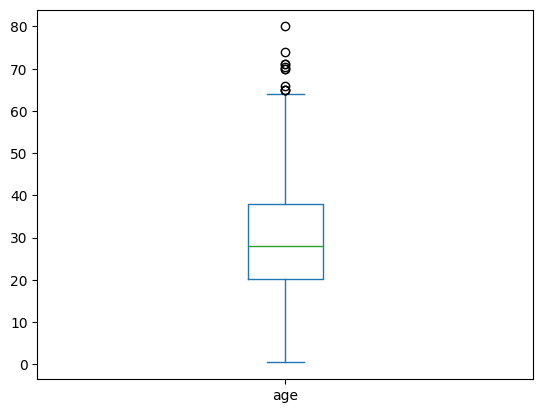

In [20]:
titanic_df['age'].plot(kind = "box")

In [21]:
titanic_df['age'].mean(), titanic_df['age'].median()

(29.69911764705882, 28.0)

## Données aberrantes

### Regarder la distribution de `fare`

<Axes: ylabel='Frequency'>

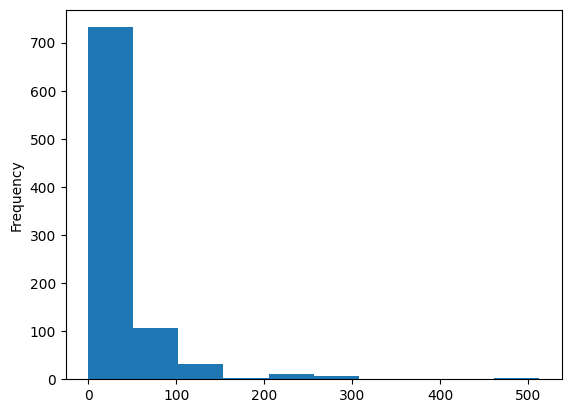

In [22]:
titanic_df['fare'].plot(kind = "hist")

In [24]:
titanic_df.sort_values(by = "fare", ascending = False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,1,3,male,25.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,yes,True
732,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
674,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
179,0,3,male,36.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True


In [27]:
titanic_df[titanic_df['embark_town'] == "Cherbourg"]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
30,0,1,male,40.0,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,1,2,female,27.0,1,0,13.8583,C,Second,woman,False,NaN,Cherbourg,yes,False
874,1,2,female,28.0,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False


<Axes: ylabel='Frequency'>

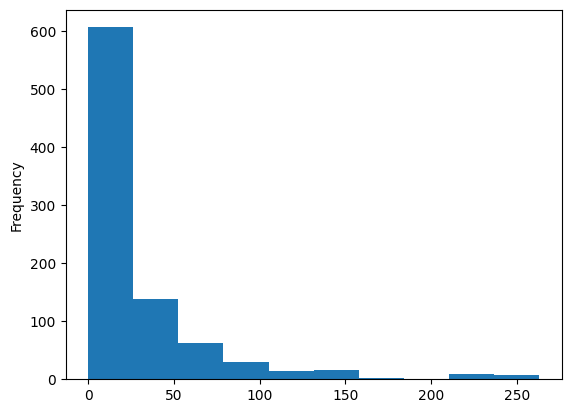

In [25]:
titanic_df[titanic_df['fare'] < 500]['fare'].plot(kind = "hist")

In [26]:
titanic_df['fare'].mean(), titanic_df['fare'].median()

(32.204207968574636, 14.4542)

## Pourquoi ces notions sont importantes dans un contexte de Machine Learning ?

1. Comprendre les données : Les statistiques descriptives (moyenne, médiane, variance, etc.) permettent de mieux comprendre la distribution des variables, de détecter les valeurs aberrantes et d'avoir une idée générale de la qualité des données.

2. Prétraitement : Avant d'entraîner un modèle de ML, il est crucial de nettoyerles données et décider que faire avec les valeurs aberrantes.

3. Choix des variables : L'analyse statistique aide à identifier les variables les plus pertinentes pour le modèle. Les techniques comme l'analyse de corrélation permettent de détecter les relations entre variables et d'éliminer celles qui sont redondantes ou peu informatives. 

4. Choix des modèles : Certaines techniques de ML supposent que les données suivent une distribution spécifique (on en reparlera dans le module Machine Learning)

5. Évaluation : Les mesures de performance des modèles sont basées sur des principes statistiques. Comprendre ces métriques est essentiel pour évaluer et comparer les modèles (on en reparlera dans le module Machine Learning)

En résumé, une bonne maîtrise des statistiques est indispensable pour tout praticien en machine learning, que ce soit pour explorer les données, construire des modèles robustes ou interpréter les résultats de manière fiable.
